In [1]:
import numpy as np
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#filepath = "../Desktop/'Project 2'/dataset"

In [3]:
def load_movies_metadata(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    # covert each item of release_date to datetime.date type entity
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: x.date())
    # all json columns`
    json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
    for column in json_columns:
        # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

In [4]:
movies = load_movies_metadata(r"/Users/c_ladd/Desktop/Project 2/dataset/movies_metadata.csv")

In [5]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92


In [ ]:
movies["main_genre"] = movies["genres"].map(lambda x: x[0]["name"] if len(x) != 0 else "None")

In [6]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                90
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
movies.shape

(45466, 24)

In [8]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null object
revenue                  45460 non-null object
runtime                  45203 non-null object
spoken_languages         45460 non-null object
status                   45379 non-null object


In [26]:
genre_revenue = {}

for i in range(movies.shape[0]):
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['revenue'] is not np.nan:
            a = item['name']
            b = int(movies.iloc[i]['revenue'])/1000000
            if a in genre_revenue:
                genre_revenue[a]['total_revenue'] += b 
            else:
                genre_revenue[a] = {}
                genre_revenue[a]['genre'] = a
                genre_revenue[a]['total_revenue'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genre','revenue'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genre':v['genre'],'revenue':v['total_revenue']},ignore_index=True)

In [27]:
most_profitable_genre = most_profitable_genre.sort_values(by='revenue',ascending=False)

In [28]:
most_profitable_genre.head(10)

,genre,revenue
7,Action,201456.461294
3,Adventure,200119.343481
1,Comedy,166897.270043
6,Drama,160844.199830
9,Thriller,129821.552609
2,Family,107235.185780
4,Fantasy,104034.711338
12,Science Fiction,97915.233082
5,Romance,73506.661600
0,Animation,67530.135617


In [29]:
movies["main_genre"] = movies["genres"].map(lambda x: x[0]["name"] if len(x) != 0 else "None")

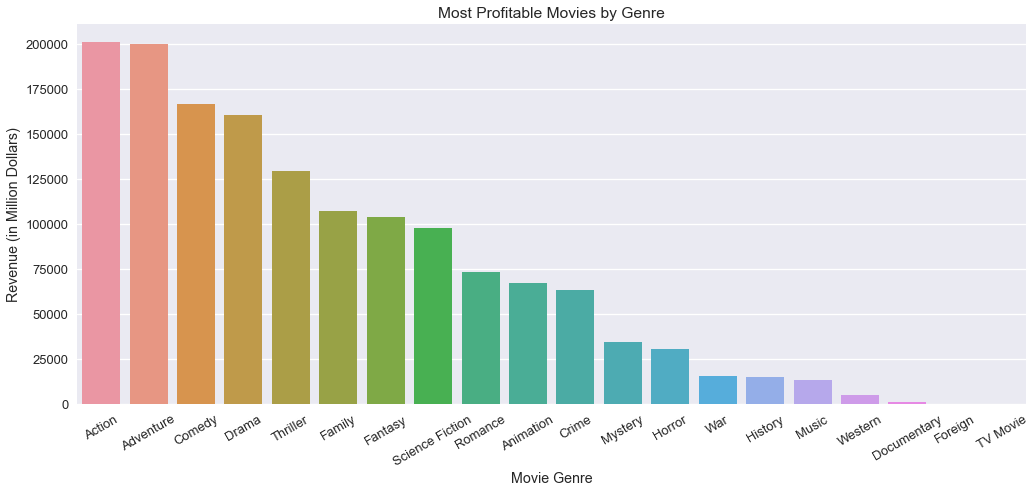

In [68]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_profitable_genre['genre'],y=most_profitable_genre['revenue'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Revenue (in Million Dollars)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Most Profitable Movies by Genre")

plt.savefig("profitable_movies_genre.png")

In [34]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
                                                                           

In [35]:
movies['revenue'] = pd.to_numeric(movies['revenue'])
movies['budget'] = pd.to_numeric(movies['budget'],errors='coerce')
movies['vote_count'] = pd.to_numeric(movies['vote_count'],errors='coerce')
movies['vote_average'] = pd.to_numeric(movies['vote_average'],errors='coerce')
movies['profit'] = movies['revenue'] - movies['budget']

movies['revenue'] = movies['revenue'].replace(0, np.nan)
movies['budget'] = movies['budget'].replace(0,np.nan)
movies['profit'].max()

2550965087.0

In [64]:
top_10 = movies[movies['budget'].notnull()][['title','budget','revenue','year','main_genre']].sort_values('revenue',ascending=False).head(10)


In [65]:
top_10.set_index('title')

,budget,revenue,year,main_genre
title,,,,
Avatar,237000000.0,2.787965e+09,2009,Action
Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015,Action
Titanic,200000000.0,1.845034e+09,1997,Drama
The Avengers,220000000.0,1.519558e+09,2012,Science Fiction
Jurassic World,150000000.0,1.513529e+09,2015,Action
Furious 7,190000000.0,1.506249e+09,2015,Action
Avengers: Age of Ultron,280000000.0,1.405404e+09,2015,Action
Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011,Family
Frozen,150000000.0,1.274219e+09,2013,Animation


In [63]:
top_10.dtypes

title       object
budget     float64
revenue    float64
year        object
dtype: object

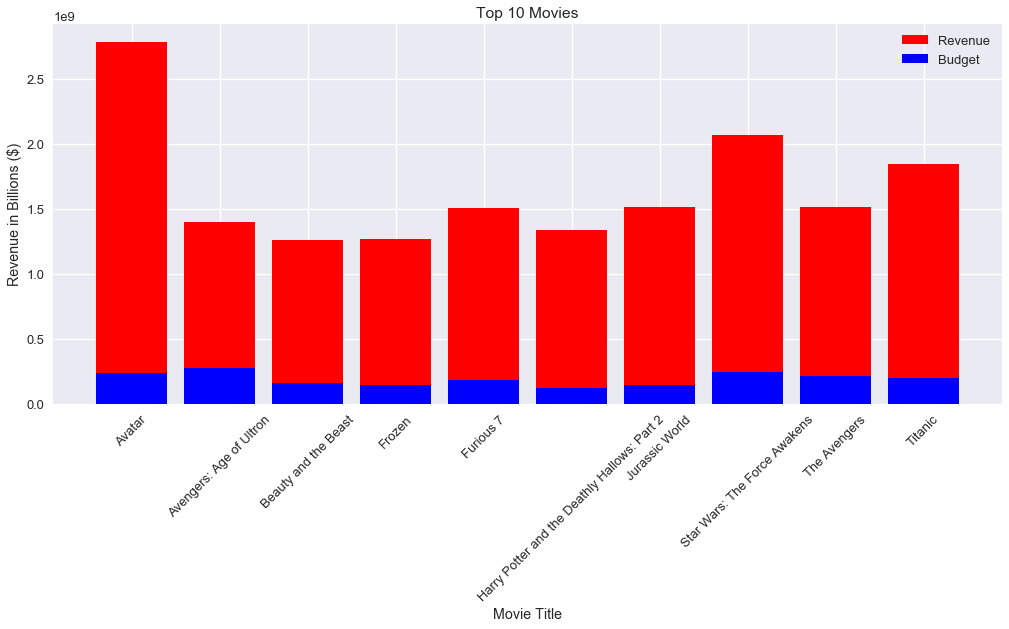

In [108]:
plt.figure(figsize=(17,7))
plt.bar(top_10.title,top_10.revenue,color='red')
plt.bar(top_10.title,top_10.budget,color='blue')
plt.legend(('Revenue','Budget'))
plt.ylabel('Revenue in Billions ($)')
plt.xlabel('Movie Title')
plt.title("Top 10 Movies")
plt.xticks(rotation=45)

plt.savefig("top_10_movies.png")

plt.show()

In [40]:
# Function that computes the weighted rating of each movie
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.90)

In [41]:
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(4555, 27)

In [42]:
print(C)
print(m)

5.618207215133889
160.0


In [43]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [44]:
q_movies['weighted_score'] = q_movies.apply(weighted_rating,axis=1)
q_movies.weighted_score.head(5)

0    7.640253
1    6.820293
4    5.660700
5    7.537201
8    5.556626
Name: weighted_score, dtype: float64

In [102]:
top_popular = q_movies[(q_movies['budget'] >= 0) & (q_movies['revenue'] >= 0) &(q_movies['vote_average'] >= 8.0) & (q_movies['vote_count'] >=500)]
top_popular = top_popular[['title','year','vote_average','vote_count','profit','weighted_score','main_genre']].sort_values('vote_average',ascending=False)



top_25 = top_popular.sort_values('weighted_score',ascending=False).head(50)
top_25.set_index('title')

,year,vote_average,vote_count,profit,weighted_score,main_genre
title,,,,,,
The Shawshank Redemption,1994,8.5,8358.0,3.341469e+06,8.445869,Drama
The Godfather,1972,8.5,6024.0,2.390664e+08,8.425439,Drama
Dilwale Dulhania Le Jayenge,1995,9.1,661.0,8.680000e+07,8.421453,Comedy
The Dark Knight,2008,8.3,12269.0,8.195584e+08,8.265477,Drama
Fight Club,1999,8.3,9678.0,3.785375e+07,8.256385,Drama
Pulp Fiction,1994,8.3,8670.0,2.059288e+08,8.251406,Thriller
Schindler's List,1993,8.3,4436.0,2.993656e+08,8.206639,Drama
Whiplash,2014,8.3,4376.0,9.792000e+06,8.205404,Drama
Spirited Away,2001,8.3,3968.0,2.599251e+08,8.196055,Fantasy


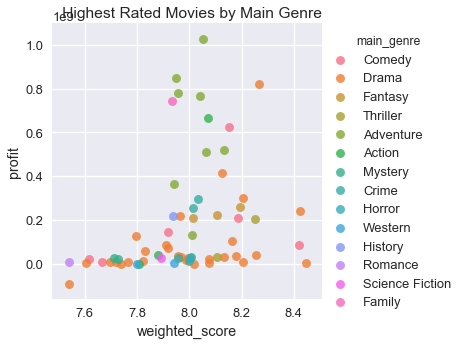

In [70]:
plt.figure(figsize=(17,10))
sns.set()
sns.set_context("talk")
sns.lmplot( x="weighted_score", y="profit", data=top_popular, fit_reg=False, hue='main_genre', legend=True,legend_out=True,scatter_kws={"s": 80})
plt.title("   Highest Rated Movies by Main Genre",loc='right')

plt.savefig("highest_rated_movies_genre.png")
#plt.legend(loc='upper left')

In [47]:
q_movies.main_genre.value_counts()

Drama              985
Comedy             917
Action             765
Adventure          381
Horror             325
Thriller           226
Crime              214
Animation          183
Fantasy            137
Science Fiction     94
Romance             93
Family              63
Mystery             55
Documentary         33
Western             22
Music               22
History             18
War                 18
TV Movie             3
None                 1
Name: main_genre, dtype: int64

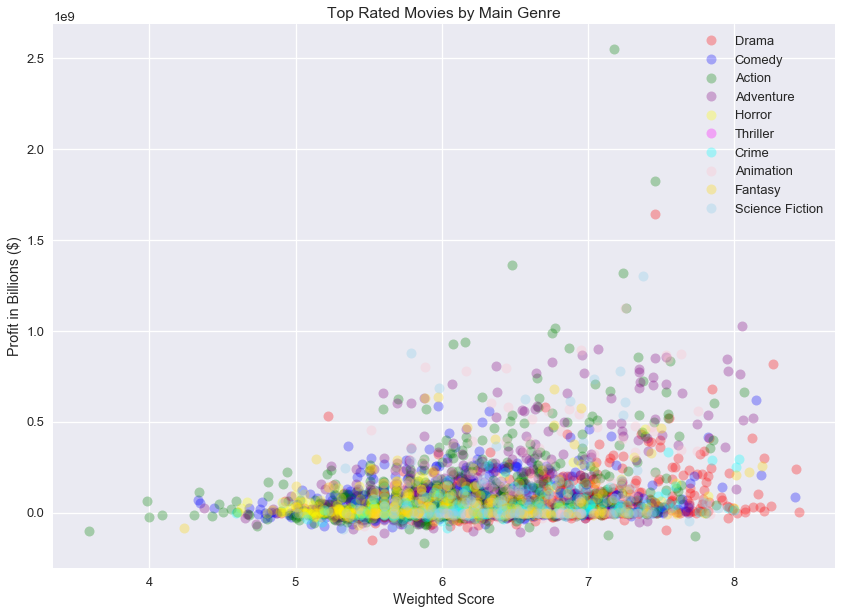

In [107]:
drama = q_movies[q_movies["main_genre"] == "Drama"]
comedy = q_movies[q_movies["main_genre"] == "Comedy"]
action = q_movies[q_movies["main_genre"] == "Action"]
adventure = q_movies[q_movies["main_genre"] == "Adventure"]
horror = q_movies[q_movies["main_genre"] == "Horror"]
thriller = q_movies[q_movies["main_genre"] == "thriller"]
crime = q_movies[q_movies["main_genre"] == "Crime"]
animation = q_movies[q_movies["main_genre"] == "Animation"]
fantasy = q_movies[q_movies["main_genre"] == "Fantasy"]
sci_fi = q_movies[q_movies["main_genre"] == "Science Fiction"]

plt.figure(figsize=(14,10))
plt.plot(drama.weighted_score,drama.profit,linestyle='', marker='o', markersize=10,alpha=0.3,color='red',label="Drama",mec='black')
plt.plot(comedy.weighted_score,comedy.profit,linestyle='', marker='o', markersize=10,alpha=0.3,color='blue',label="Comedy",mec='black')
plt.plot(action.weighted_score,action.profit,linestyle='', marker='o', markersize=10,alpha=0.3,color='green',label='Action',mec='black')
plt.plot(adventure.weighted_score,adventure.profit,linestyle='', marker='o', markersize=10,alpha=0.3,color='purple',label='Adventure',mec='black')
plt.plot(horror.weighted_score,horror.profit,linestyle='', marker='o', markersize=10,alpha=0.3,color='yellow',label='Horror',mec='black')
plt.plot(thriller.weighted_score,thriller.profit,linestyle='', marker='o', markersize=10,alpha=0.3,label="Thriller",color='magenta',mec='black')
plt.plot(crime.weighted_score,crime.profit,linestyle='', marker='o', markersize=10,alpha=0.3,label="Crime",color='cyan',mec='black')
plt.plot(animation.weighted_score,animation.profit,linestyle='', marker='o', markersize=10,alpha=0.3,label="Animation",color='pink',mec='black')
plt.plot(fantasy.weighted_score,fantasy.profit,linestyle='', marker='o', markersize=10,alpha=0.3,label='Fantasy',color='gold',mec='black')
plt.plot(sci_fi.weighted_score,sci_fi.profit,linestyle='', marker='o', markersize=10,alpha=0.3,label='Science Fiction',color='skyblue',mec='black')


plt.title("Top Rated Movies by Main Genre")
plt.legend(markerscale=1)
plt.xlabel("Weighted Score")
plt.ylabel("Profit in Billions ($)")



plt.savefig("top_rated_movies_all.png")

plt.show()




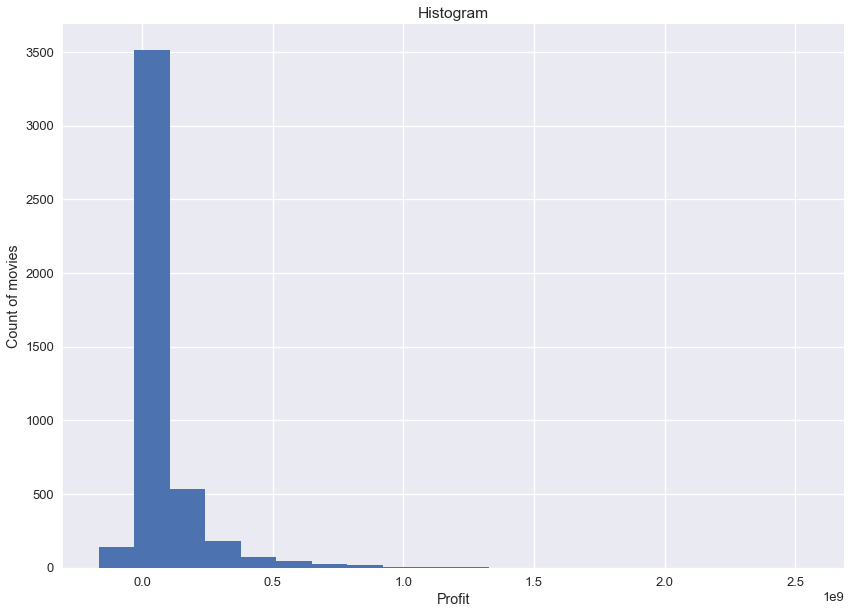

In [101]:
plt.figure(figsize=(14,10))

plt.hist(q_movies.profit,bins=20,align='mid')
plt.xlabel("Profit")
plt.ylabel("Count of movies")
plt.title("Histogram")

plt.savefig("hist_movies")
plt.show()